In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [31]:
X1 = pd.read_csv('long-DJI.csv')
#X2 = pd.read_csv('droneup1.csv')
#X3 = pd.read_csv('dronedown1.csv')
#X4 = pd.read_csv('drone3.csv')
#X5 = pd.read_csv('dronewave.csv')
#X6 = pd.read_csv('higher1.csv')

c:\users\20809\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (271) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [32]:
str(X1.iloc[[0]]['CUSTOM.updateTime'])[-43:-41]

'40'

In [33]:
str(X1.iloc[[0]]['CUSTOM.updateTime'])[-46:-44]

'32'

In [34]:
X1

,CUSTOM.updateTime,CUSTOM.isPhoto,CUSTOM.isVideo,CUSTOM.hSpeed [m/s],CUSTOM.distance [m],CUSTOM.travelled [m],CUSTOM.hSpeed.running_max [m/s],CALC.hSpeed [m/s],CALC.distance [m],CALC.travelled [m],...,DETAILS.rcSn,DETAILS.batterySn,DETAILS.appType,DETAILS.appVersion,APP_GPS.latitude,APP_GPS.longitude,APP_GPS.accuracy,APP_TIP.tip,APP_WARN.warn,APP_SER_WARN.warn
0,32:40.0,NaN,NaN,0.0,0.89,NaN,0.00,0.06,0.00,0.94,...,NaN,093XF4EYY402N,Android,4.3.37,59.405373,17.948923,42.6,NaN,NaN,NaN
1,32:40.1,NaN,NaN,0.0,0.91,NaN,0.00,0.15,0.00,0.95,...,NaN,093XF4EYY402N,Android,4.3.37,59.405373,17.948923,42.6,NaN,NaN,NaN
2,32:40.2,NaN,NaN,0.0,0.92,NaN,0.00,0.11,0.00,0.97,...,NaN,093XF4EYY402N,Android,4.3.37,59.405373,17.948923,42.6,NaN,NaN,NaN
3,32:40.3,NaN,NaN,0.0,0.94,NaN,0.00,0.15,0.00,0.98,...,NaN,093XF4EYY402N,Android,4.3.37,59.405373,17.948923,42.6,NaN,NaN,NaN
4,32:40.4,NaN,NaN,0.0,0.95,NaN,0.00,0.10,0.00,0.99,...,NaN,093XF4EYY402N,Android,4.3.37,59.405373,17.948923,42.6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4502,41:29.4,NaN,NaN,0.0,68.28,NaN,2.12,0.08,2.65,68.47,...,NaN,093XF4EYY402N,Android,4.3.37,59.405723,17.948612,168.0,NaN,NaN,NaN
4503,41:29.5,NaN,NaN,0.0,68.29,NaN,2.12,0.09,2.64,68.48,...,NaN,093XF4EYY402N,Android,4.3.37,59.405723,17.948612,168.0,NaN,NaN,NaN
4504,41:29.6,NaN,NaN,0.0,68.30,NaN,2.12,0.08,2.63,68.48,...,NaN,093XF4EYY402N,Android,4.3.37,59.405723,17.948612,168.0,NaN,NaN,NaN
4505,41:29.7,NaN,NaN,0.0,68.31,NaN,2.12,0.08,2.63,68.49,...,NaN,093XF4EYY402N,Android,4.3.37,59.405723,17.948612,168.0,NaN,NaN,NaN


In [35]:
def averageSecondDJI(a):
    last = str(a.iloc[[0]]['CUSTOM.updateTime'])[-43:-41]
    minute = []
    second = []
    minute.append(int(str(a.iloc[[0]]['CUSTOM.updateTime'])[-46:-44]))
    second.append(int(str(a.iloc[[0]]['CUSTOM.updateTime'])[-43:-41]))
    for i in range(a.shape[0]):
        #print(int(str(a.iloc[[0]]['CUSTOM.updateTime'])[-41:-39]))
        if str(a.iloc[[i]]['CUSTOM.updateTime'])[-43:-41] != last:
            minute.append(int(str(a.iloc[[i]]['CUSTOM.updateTime'])[-46:-44]))
            second.append(int(str(a.iloc[[i]]['CUSTOM.updateTime'])[-43:-41]))
            last = str(a.iloc[[i]]['CUSTOM.updateTime'])[-43:-41]
    countSample = len(minute)
    newTable = np.zeros((countSample, 3)) 
    for j in range(countSample):
        newTable[j][0] = minute[j]
        newTable[j][1] = second[j]
    last = str(a.iloc[[0]]['CUSTOM.updateTime'])[-43:-41]
    sumDistance = 0
    countSecond = 0
    countTable = 0
    for k in range(a.shape[0]):
        if str(a.iloc[[k]]['CUSTOM.updateTime'])[-43:-41] == last:
            countSecond += 1
            #print(float(str(a.iloc[k]['OSD.height [m]'])))
            sumDistance += float(str(a.iloc[k]['OSD.height [m]']))
        else:
            #print(last)
            newTable[countTable][2] = sumDistance / countSecond
            sumDistance = float(str(a.iloc[k]['OSD.height [m]']))
            countSecond = 1
            last = str(a.iloc[[k]]['CUSTOM.updateTime'])[-43:-41]
            countTable += 1
    newTable[countTable][2] = sumDistance / countSecond
    return newTable

In [48]:
DATADist = averageSecondDJI(X1)
DATADist.shape

(454, 3)

In [37]:
X2 = pd.read_csv('long.log1.csv')

In [38]:
def averageSecondLOG(a):
    last = str(a.iloc[[0]]['LocalTime'])[-33:-31]
    minute = []
    second = []
    minute.append(int(str(a.iloc[[0]]['LocalTime'])[-36:-34]))
    second.append(int(str(a.iloc[[0]]['LocalTime'])[-33:-31]))
    for i in range(a.shape[0]):
        #print(int(str(a.iloc[[0]]['CUSTOM.updateTime'])[-41:-39]))
        #print(str(a.iloc[[i]]['LocalTime'])[8:10])
        if str(a.iloc[[i]]['LocalTime'])[-33:-31] != last:
            #print(str(a.iloc[[i]]['LocalTime'])[8:10])
            minute.append(int(str(a.iloc[[i]]['LocalTime'])[-36:-34]))
            second.append(int(str(a.iloc[[i]]['LocalTime'])[-33:-31]))
            last = str(a.iloc[[i]]['LocalTime'])[-33:-31]
    countSample = len(minute)
    newTable = np.zeros((countSample, 3)) 
    for j in range(countSample):
        newTable[j][0] = minute[j]
        newTable[j][1] = second[j]
    last = str(a.iloc[[0]]['LocalTime'])[-33:-31]
    sumDistance = 0
    countSecond = 0
    countTable = 0
    #print(newTable)
    for k in range(a.shape[0]):
        if str(a.iloc[[k]]['LocalTime'])[-33:-31] == last:
            if float(str(a.iloc[k][' Power'])) <= -20:
                countSecond += 1
                #print(float(str(a.iloc[k]['OSD.height [m]'])))
                sumDistance += float(str(a.iloc[k][' Power']))
        else:
            #print(last)
            newTable[countTable][2] = sumDistance / countSecond
            sumDistance = float(str(a.iloc[k][' Power']))
            countSecond = 1
            last = str(a.iloc[[k]]['LocalTime'])[-33:-31]
            countTable += 1
    newTable[countTable][2] = sumDistance / countSecond
    return newTable

In [47]:
DATAPower = averageSecondLOG(X2)
DATAPower.shape

(248, 3)

In [55]:
Distance = np.zeros((224,1))
Power = np.zeros((224,1))
k = 0
for i in range(454):
    for j in range(248):
        if((DATADist[i][0]==DATAPower[j][0]) & (DATADist[i][1]==DATAPower[j][1])):
            Distance[k][0] = DATADist[i][2]
            Power[k][0] = DATAPower[j][2]
            k = k+1
            break
print(np.array(Distance.T))
print(np.array(Power.T))
            
        
    


[[ 1.10000000e+00  1.10000000e+00  1.10000000e+00  1.12000000e+00
   1.31000000e+00  1.59000000e+00  1.86666667e+00  2.26363636e+00
   2.65000000e+00  2.77000000e+00  2.80000000e+00  2.80000000e+00
   3.06000000e+00  3.57272727e+00  5.05000000e+00  6.60000000e+00
   7.55454545e+00  7.96000000e+00  9.25000000e+00  9.71000000e+00
   1.01909091e+01  1.10100000e+01  1.14200000e+01  1.23090909e+01
   1.27333333e+01  1.31500000e+01  1.45923077e+01  1.59272727e+01
   1.63500000e+01  1.82777778e+01  1.93400000e+01  1.97600000e+01
   2.07800000e+01  2.10454545e+01  2.19222222e+01  2.23300000e+01
   2.37272727e+01  2.60181818e+01  2.66444444e+01  2.79909091e+01
   2.86400000e+01  3.09400000e+01  3.28909091e+01  3.35500000e+01
   3.49200000e+01  3.54727273e+01  3.62888889e+01  3.82600000e+01
   3.87200000e+01  3.97454545e+01  4.02222222e+01  4.14454545e+01
   4.21500000e+01  4.47363636e+01  4.66900000e+01  4.74900000e+01
   4.67800000e+01  4.63111111e+01  4.33375000e+01  3.70200000e+01
   3.70000

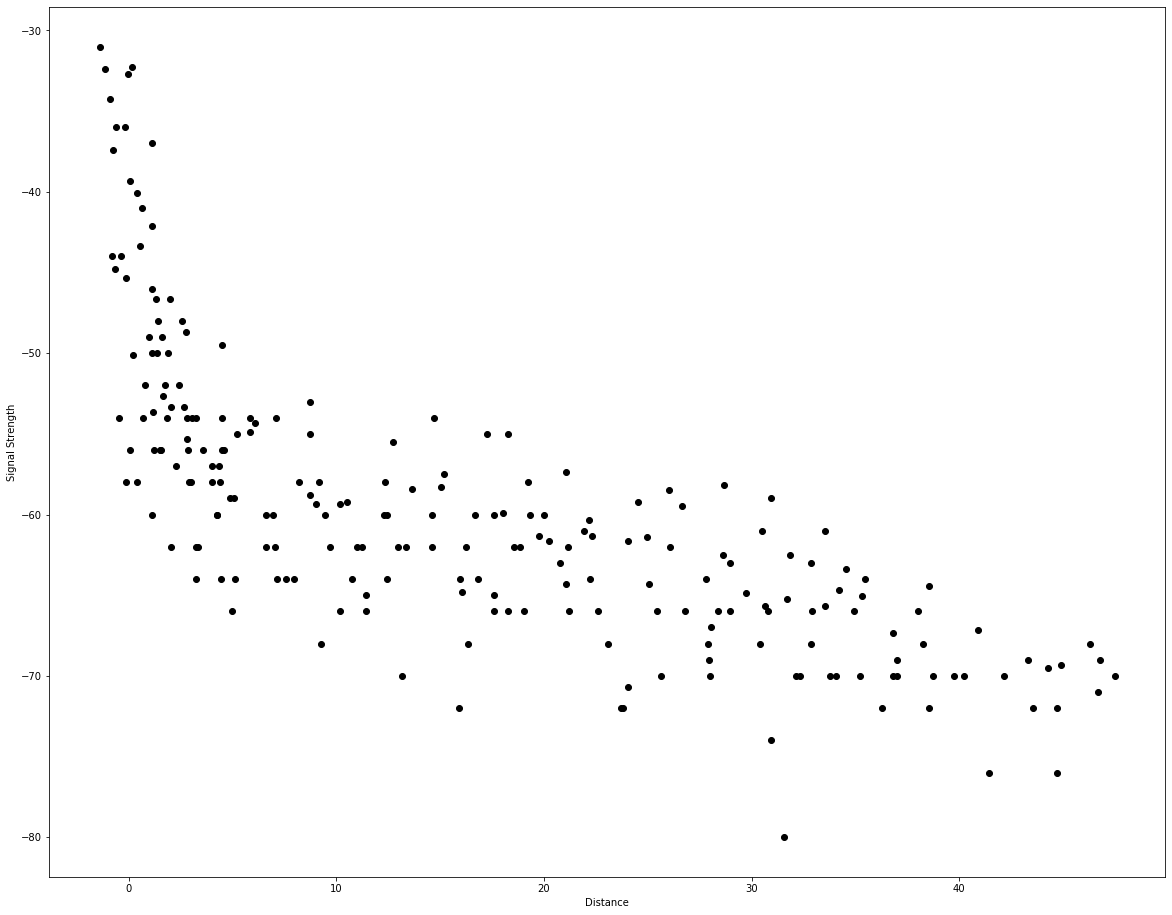

In [53]:
figure(num=None, figsize=(20, 16))
plt.xlabel('Distance')
plt.ylabel('Signal Strength')
plt.plot(Distance, Power, 'o', color='black');